## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

## Loading Data

In [2]:
train_data= pd.read_csv('Seniors.csv')
test_data= pd.read_csv('Juniors.csv')

train_data.head()

,Unnamed: 0,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


## Cleaning Data

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      2500 non-null   int64  
 1   Temperature (°C)                2500 non-null   float64
 2   Pressure (kPa)                  2500 non-null   float64
 3   Temperature x Pressure          2500 non-null   float64
 4   Material Fusion Metric          2500 non-null   float64
 5   Material Transformation Metric  2500 non-null   float64
 6   Quality Rating                  2500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 136.8 KB


In [4]:
train_data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
X_train= train_data.drop('Quality Rating', axis=1)
y_train= train_data['Quality Rating']

print(X_train.head())
print("\n-------------------\n")
print(y_train.head())

   Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
0        209.762701        8.050855             1688.769167   
1        243.037873       15.812068             3842.931469   
2        220.552675        7.843130             1729.823314   
3        208.976637       23.786089             4970.736918   
4        184.730960       15.797812             2918.345014   

   Material Fusion Metric  Material Transformation Metric  
0            44522.217074                    9.229576e+06  
1            63020.764997                    1.435537e+07  
2            49125.950249                    1.072839e+07  
3            57128.881547                    9.125702e+06  
4            38068.201283                    6.303792e+06  

-------------------

0     99.999971
1     99.985703
2     99.999758
3     99.999975
4    100.000000
Name: Quality Rating, dtype: float64


## Normalising the data

In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

X_train_sc= scaler.fit_transform(X_train)

X_train_sc= pd.DataFrame(X_train_sc, columns=X_train.columns)
X_train_sc.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
0,0.155431,-1.183456,-0.874535,-0.160628,-0.119559
1,0.723225,0.177276,0.599798,0.608571,0.548143
2,0.339547,-1.219875,-0.846437,0.030803,0.075681
3,0.142018,1.575319,1.371680,0.363577,-0.133090
4,-0.271701,0.174777,-0.032999,-0.428996,-0.500682


## Linear Regression Model

In [7]:
def lin_func(x, w, b):
    return np.dot(x, w) + b

def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        cost += (lin_func(x[i], w, b) - y[i])**2

    return cost / (2 * m)

def grad_desc(x, y, w, b, alpha, num_iters):

    m = x.shape[0]
    cost_history = []

    for _ in range(num_iters):

        dJ_dw, dJ_db = 0, 0

        for i in range(m):
            dJ_dw += (lin_func(x[i], w, b) - y[i]) * x[i]
            dJ_db += (lin_func(x[i], w, b) - y[i])
        w -= alpha * dJ_dw / m
        b -= alpha * dJ_db / m
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)

        # Debugging statements
        print(f"Iteration {_+1}: Cost {compute_cost(x, y, w, b)}, w: {w}, b: {b}")

    return w, b, cost_history

## Training the model

In [8]:
# Definition to evaluate accuracy of the model

def calculate_accuracy(y_true, y_pred, tolerance=0.1):

    within_tolerance = np.abs(y_true - y_pred) <= (tolerance * y_true)
    accuracy = np.mean(within_tolerance) * 100
    
    return accuracy

In [9]:
w= np.zeros(X_train_sc.shape[1])
b= 0
alpha= 0.01
iterations= 10000

# Ensure X_train_sc and y_train are numpy arrays
X_train_sc = np.array(X_train_sc)
y_train = np.array(y_train)


w, b, cost_history= grad_desc(X_train_sc, y_train, w, b, alpha, iterations)

train_pred= np.array(lin_func(X_train_sc, w, b))

# Clipping the predictions to ensure they do not exceed 100
train_pred = np.clip(train_pred, None, 100)

Iteration 1: Cost 4606.922831136659, w: [-0.06254379  0.00225391 -0.03457303 -0.06917568 -0.07785511], b: 0.960393074444163
Iteration 2: Cost 4515.508293409141, w: [-0.12282839  0.00484987 -0.06752151 -0.13604861 -0.15345138], b: 1.911182218143888
Iteration 3: Cost 4425.979536866983, w: [-0.18093028  0.00776866 -0.0989066  -0.20069793 -0.22686503], b: 2.8524634704066116
Iteration 4: Cost 4338.294480683089, w: [-0.2369233   0.01099182 -0.1287873  -0.26320004 -0.29816969], b: 3.7843319101467094
Iteration 5: Cost 4252.412192791485, w: [-0.29087876  0.01450166 -0.15722046 -0.32362867 -0.36743643], b: 4.706881665489407
Iteration 6: Cost 4168.292845701704, w: [-0.34286551  0.01828119 -0.1842609  -0.38205501 -0.4347339 ], b: 5.620205923278678
Iteration 7: Cost 4085.897674654001, w: [-0.39295002  0.02231412 -0.20996146 -0.43854778 -0.50012837], b: 6.524396938490055
Iteration 8: Cost 4005.1889379688496, w: [-0.44119649  0.02658484 -0.23437306 -0.49317331 -0.56368384], b: 7.419546043549319
Itera

In [10]:
print(train_pred[:5])

print(f"\nAccuracy on training data: {calculate_accuracy(y_train, train_pred):.2f}%")

[100.          95.95279694 100.         100.         100.        ]

Accuracy on training data: 83.08%


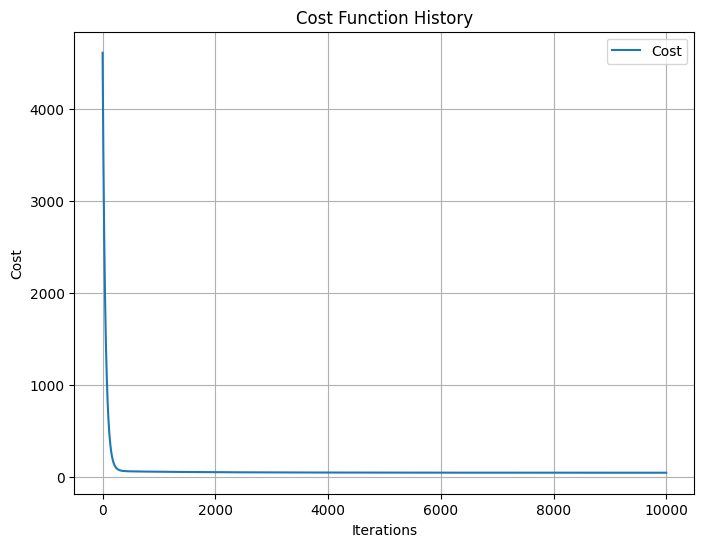

In [11]:
# Visualising the cost function

plt.figure(figsize=(8, 6))
plt.plot(cost_history, label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.legend()
plt.grid(True)
plt.show()

## Analysing Juniors.csv and Predicting the output

In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0.1                    1457 non-null   int64  
 1   Unnamed: 0                      1457 non-null   int64  
 2   Temperature (°C)                1457 non-null   float64
 3   Pressure (kPa)                  1457 non-null   float64
 4   Temperature x Pressure          1457 non-null   float64
 5   Material Fusion Metric          1457 non-null   float64
 6   Material Transformation Metric  1457 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 79.8 KB


In [13]:
# Cleaning the test data

test_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace= True)

In [17]:
test_data.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
0,270.264688,11.023763,2979.333789,74382.645868,1.974082e+07
1,147.113440,24.851899,3656.048303,36991.316027,3.183265e+06
2,251.636694,19.861983,4998.003812,71156.545998,1.593350e+07
3,226.765023,23.301227,5283.903266,64073.710961,1.166025e+07
4,291.025207,16.896895,4917.422268,89519.819801,2.464829e+07


In [16]:
# Creating a normalized dataset

# Assuming test_data is already loaded and is a DataFrame
X_test = test_data.copy()

# Use the fitted scaler from the training process
X_test_sc = scaler.transform(X_test)  # Only transform, do not fit again

# Convert back to a DataFrame for ease of use
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

X_test_sc.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
0,1.244475,-0.648532,0.029808,1.141668,1.326699
1,-0.905248,1.701026,0.495686,-0.457264,-0.893358
2,0.919305,0.853183,1.419544,1.003713,0.816208
3,0.485146,1.437549,1.616369,0.700836,0.243247
4,1.606869,0.349380,1.364069,1.788965,1.984698


In [19]:
# Fitting X_test to the model

test_pred = np.array(lin_func(X_test_sc, w, b))

# Clipping the predictions to ensure they do not exceed 100
test_pred = np.clip(test_pred, None, 100)

test_pred[:5]

array([ 84.2755929 , 100.        ,  93.05558106, 100.        ,
        74.29251806])

In [20]:
# Creating a new csv file and saving the prediciton output in it

test_data['Quality Rating'] = test_pred

test_data.to_csv('Predicted_Juniors.csv')

print("Prediction output saved to Predicted_Juniors.csv")

Prediction output saved to Predicted_Juniors.csv


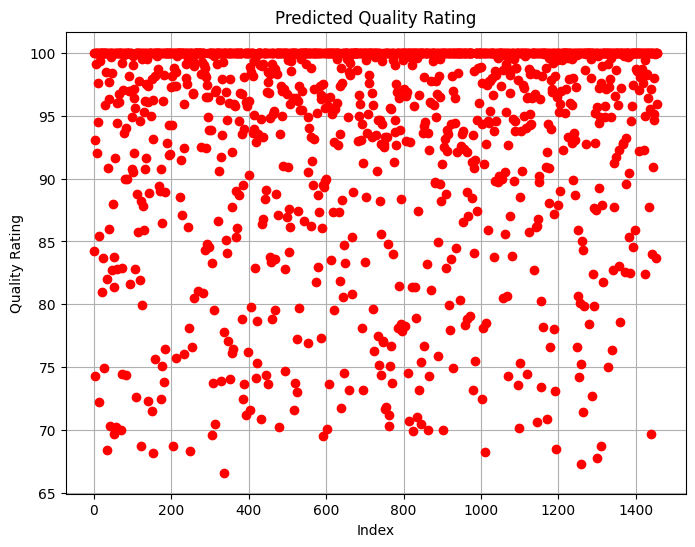

In [22]:
# Visualizing the predictions

plt.figure(figsize=(8, 6))
plt.plot(test_pred, 'ro')
plt.xlabel('Index')
plt.ylabel('Quality Rating')
plt.title('Predicted Quality Rating')
plt.grid(True)
plt.show()